# Import thư viện

In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta
from pathlib import Path
import sys
import warnings
warnings.filterwarnings('ignore')

# Thêm project root vào sys.path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# Import module tự viết
from src.preprocessing.technical_indicators import TechnicalIndicators

# Cấu hình matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('✅ Import thành công!')

✅ Import thành công!


In [2]:
# Đường dẫn
DATA_DIR = Path('../data/processed')

print("📂 Đang load dữ liệu...")

# Load 4 datasets
btc_5m = pd.read_csv(DATA_DIR / 'BTCUSDT_5m_clean.csv')
eth_5m = pd.read_csv(DATA_DIR / 'ETHUSDT_5m_clean.csv')
btc_1d = pd.read_csv(DATA_DIR / 'BTCUSDT_1d_clean.csv')
eth_1d = pd.read_csv(DATA_DIR / 'ETHUSDT_1d_clean.csv')

# Chuyển datetime
for df in [btc_5m, eth_5m, btc_1d, eth_1d]:
    df['datetime'] = pd.to_datetime(df['datetime'])

print('✅ Load dữ liệu thành công!\n')
print(f'📊 Số lượng dữ liệu:')
print(f'  • BTC 5m: {len(btc_5m):,} nến')
print(f'  • ETH 5m: {len(eth_5m):,} nến')
print(f'  • BTC 1d: {len(btc_1d):,} nến')
print(f'  • ETH 1d: {len(eth_1d):,} nến')

📂 Đang load dữ liệu...
✅ Load dữ liệu thành công!

📊 Số lượng dữ liệu:
  • BTC 5m: 52,416 nến
  • ETH 5m: 52,416 nến
  • BTC 1d: 1,095 nến
  • ETH 1d: 1,095 nến


In [3]:
# Xem sample dữ liệu BTC 5m
print("📋 Sample dữ liệu BTC 5m:")
print(btc_5m.head(10))

print("\n📊 Thông tin dataset:")
print(btc_5m.info())

print("\n📈 Thống kê mô tả:")
print(btc_5m.describe())

📋 Sample dữ liệu BTC 5m:
             datetime      open      high       low     close     volume
0 2025-04-27 08:30:00  94721.31  94761.91  94250.00  94271.49  206.51360
1 2025-04-27 08:35:00  94271.49  94521.74  94267.52  94500.63   85.30148
2 2025-04-27 08:40:00  94500.63  94542.35  94440.50  94529.65   28.85467
3 2025-04-27 08:45:00  94529.65  94542.34  94334.32  94445.12   50.22792
4 2025-04-27 08:50:00  94445.12  94509.74  94325.54  94385.23   87.17301
5 2025-04-27 08:55:00  94385.23  94407.33  94041.60  94117.60  192.80997
6 2025-04-27 09:00:00  94117.60  94280.00  94050.15  94128.86   88.31928
7 2025-04-27 09:05:00  94128.85  94287.99  94110.00  94261.99   40.20392
8 2025-04-27 09:10:00  94261.99  94399.99  94261.99  94399.53   37.67584
9 2025-04-27 09:15:00  94399.52  94428.57  94304.34  94428.56   26.91392

📊 Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype      

In [4]:
# Tính RSI(14) cho BTC 5m
print("🔄 Đang tính RSI(14) cho BTC 5m...")

btc_5m_rsi = TechnicalIndicators.add_rsi(btc_5m, period=14, column='close')

print("✅ Hoàn thành!\n")

# Hiển thị sample kết quả
print("📋 Sample dữ liệu với RSI:")
print(btc_5m_rsi[['datetime', 'close', 'RSI_14']].tail(20))

# Kiểm tra NaN
nan_count = btc_5m_rsi['RSI_14'].isna().sum()
print(f"\n⚠️  Số dòng NaN: {nan_count} (do RSI cần ít nhất 14 nến)")

🔄 Đang tính RSI(14) cho BTC 5m...
✅ Hoàn thành!

📋 Sample dữ liệu với RSI:
                 datetime      close     RSI_14
52396 2025-10-26 06:50:00  111615.10  55.815743
52397 2025-10-26 06:55:00  111646.27  58.706531
52398 2025-10-26 07:00:00  111584.48  51.511700
52399 2025-10-26 07:05:00  111577.54  50.759254
52400 2025-10-26 07:10:00  111576.22  50.607833
52401 2025-10-26 07:15:00  111589.57  52.162133
52402 2025-10-26 07:20:00  111633.34  56.945913
52403 2025-10-26 07:25:00  111742.26  66.045349
52404 2025-10-26 07:30:00  111813.03  70.419834
52405 2025-10-26 07:35:00  111853.88  72.613132
52406 2025-10-26 07:40:00  111844.64  71.324875
52407 2025-10-26 07:45:00  111771.48  61.952818
52408 2025-10-26 07:50:00  111732.13  57.571009
52409 2025-10-26 07:55:00  111715.98  55.825830
52410 2025-10-26 08:00:00  111725.75  56.681326
52411 2025-10-26 08:05:00  111735.30  57.546799
52412 2025-10-26 08:10:00  111795.74  62.634845
52413 2025-10-26 08:15:00  111701.24  52.117297
52414 2025-10

In [5]:
# Phân tích RSI
TechnicalIndicators.analyze_rsi(btc_5m_rsi, 'RSI_14')


📊 PHÂN TÍCH RSI
Tổng số nến có RSI: 52,415
  • Quá bán (RSI < 30): 1,889 (3.60%)
  • Trung tính (30 ≤ RSI ≤ 70): 48,360 (92.26%)
  • Quá mua (RSI > 70): 2,166 (4.13%)

Giá trị RSI:
  • Min: 7.67
  • Max: 100.00
  • Mean: 50.41
  • Median: 50.47


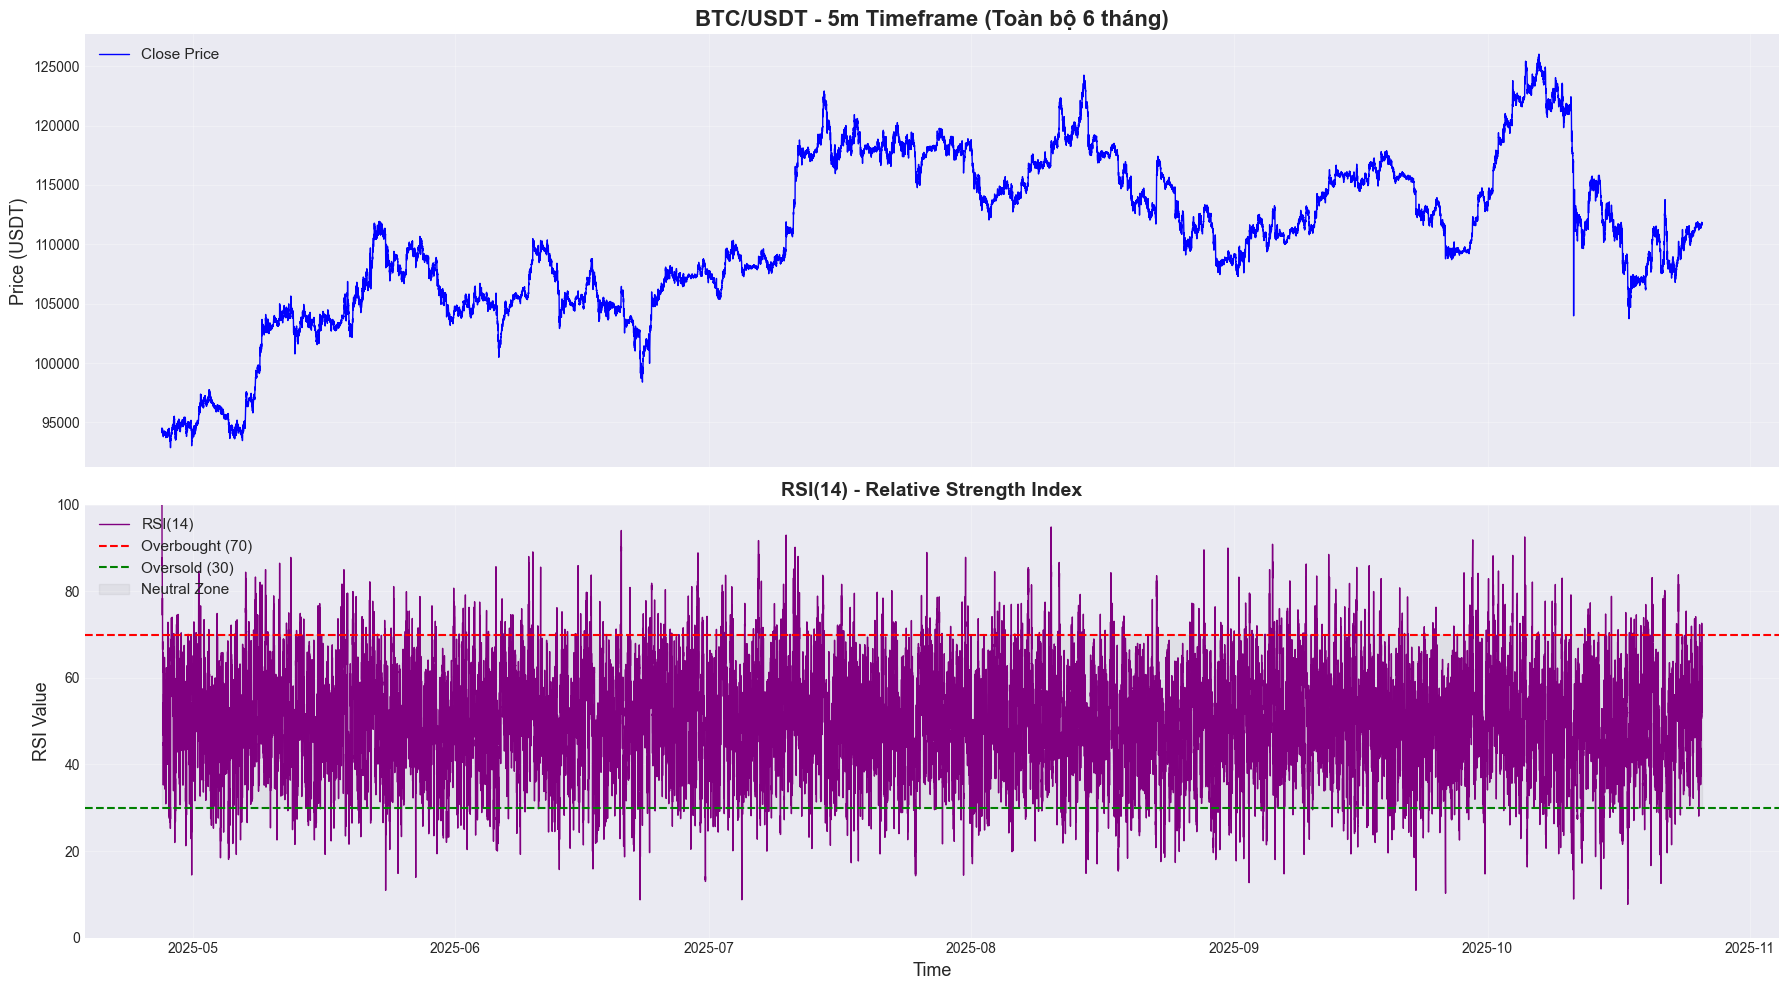

In [6]:
# Vẽ biểu đồ giá và RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

# Subplot 1: Giá Close
ax1.plot(btc_5m_rsi['datetime'], btc_5m_rsi['close'], color='blue', linewidth=1, label='Close Price')
ax1.set_title('BTC/USDT - 5m Timeframe (Toàn bộ 6 tháng)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Price (USDT)', fontsize=13)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, alpha=0.3)

# Subplot 2: RSI
ax2.plot(btc_5m_rsi['datetime'], btc_5m_rsi['RSI_14'], color='purple', linewidth=1, label='RSI(14)')
ax2.axhline(y=70, color='red', linestyle='--', linewidth=1.5, label='Overbought (70)')
ax2.axhline(y=30, color='green', linestyle='--', linewidth=1.5, label='Oversold (30)')
ax2.fill_between(btc_5m_rsi['datetime'], 30, 70, alpha=0.1, color='gray', label='Neutral Zone')
ax2.set_title('RSI(14) - Relative Strength Index', fontsize=14, fontweight='bold')
ax2.set_ylabel('RSI Value', fontsize=13)
ax2.set_xlabel('Time', fontsize=13)
ax2.set_ylim(0, 100)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

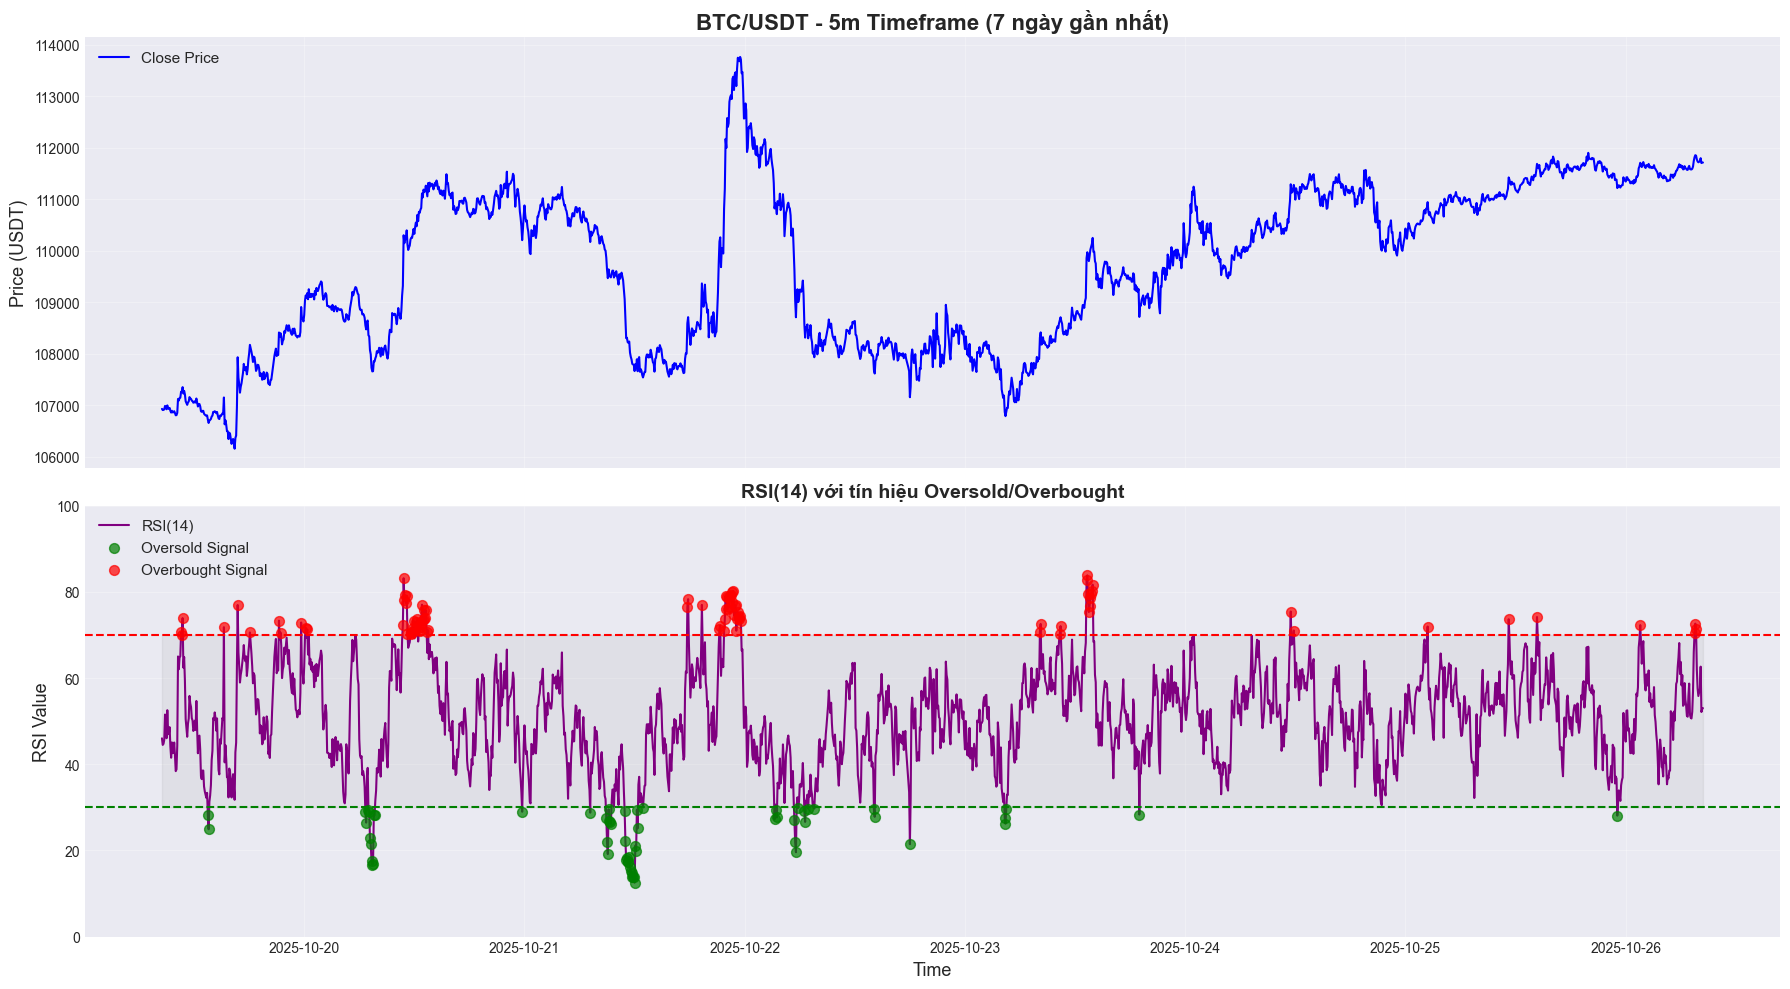

In [7]:
# Zoom vào 7 ngày gần nhất
last_week = btc_5m_rsi.tail(7 * 24 * 12)  # 7 days * 24h * 12 candles/hour

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

# Subplot 1: Giá
ax1.plot(last_week['datetime'], last_week['close'], color='blue', linewidth=1.5, label='Close Price')
ax1.set_title('BTC/USDT - 5m Timeframe (7 ngày gần nhất)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Price (USDT)', fontsize=13)
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, alpha=0.3)

# Subplot 2: RSI với highlight oversold/overbought
ax2.plot(last_week['datetime'], last_week['RSI_14'], color='purple', linewidth=1.5, label='RSI(14)')

# Highlight vùng quá mua/quá bán
oversold_mask = last_week['RSI_14'] < 30
overbought_mask = last_week['RSI_14'] > 70

ax2.scatter(last_week.loc[oversold_mask, 'datetime'], 
           last_week.loc[oversold_mask, 'RSI_14'], 
           color='green', s=50, alpha=0.7, label='Oversold Signal', zorder=5)

ax2.scatter(last_week.loc[overbought_mask, 'datetime'], 
           last_week.loc[overbought_mask, 'RSI_14'], 
           color='red', s=50, alpha=0.7, label='Overbought Signal', zorder=5)

ax2.axhline(y=70, color='red', linestyle='--', linewidth=1.5)
ax2.axhline(y=30, color='green', linestyle='--', linewidth=1.5)
ax2.fill_between(last_week['datetime'], 30, 70, alpha=0.1, color='gray')
ax2.set_title('RSI(14) với tín hiệu Oversold/Overbought', fontsize=14, fontweight='bold')
ax2.set_ylabel('RSI Value', fontsize=13)
ax2.set_xlabel('Time', fontsize=13)
ax2.set_ylim(0, 100)
ax2.legend(loc='upper left', fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Tính RSI cho tất cả datasets
print("🔄 Đang tính RSI cho tất cả datasets...\n")

datasets = {
    'BTC 5m': btc_5m,
    'ETH 5m': eth_5m,
    'BTC 1d': btc_1d,
    'ETH 1d': eth_1d
}

datasets_with_rsi = {}

for name, df in datasets.items():
    print(f"📊 Xử lý: {name}")
    df_rsi = TechnicalIndicators.add_rsi(df, period=14, column='close')
    datasets_with_rsi[name] = df_rsi
    
    # Phân tích nhanh
    TechnicalIndicators.analyze_rsi(df_rsi, 'RSI_14')
    print()

print("✅ Hoàn thành tính RSI cho tất cả datasets!")

🔄 Đang tính RSI cho tất cả datasets...

📊 Xử lý: BTC 5m

📊 PHÂN TÍCH RSI
Tổng số nến có RSI: 52,415
  • Quá bán (RSI < 30): 1,889 (3.60%)
  • Trung tính (30 ≤ RSI ≤ 70): 48,360 (92.26%)
  • Quá mua (RSI > 70): 2,166 (4.13%)

Giá trị RSI:
  • Min: 7.67
  • Max: 100.00
  • Mean: 50.41
  • Median: 50.47

📊 Xử lý: ETH 5m

📊 PHÂN TÍCH RSI
Tổng số nến có RSI: 52,415
  • Quá bán (RSI < 30): 1,704 (3.25%)
  • Trung tính (30 ≤ RSI ≤ 70): 48,536 (92.60%)
  • Quá mua (RSI > 70): 2,175 (4.15%)

Giá trị RSI:
  • Min: 9.02
  • Max: 100.00
  • Mean: 50.76
  • Median: 50.80

📊 Xử lý: BTC 1d

📊 PHÂN TÍCH RSI
Tổng số nến có RSI: 1,094
  • Quá bán (RSI < 30): 23 (2.10%)
  • Trung tính (30 ≤ RSI ≤ 70): 923 (84.37%)
  • Quá mua (RSI > 70): 148 (13.53%)

Giá trị RSI:
  • Min: 18.64
  • Max: 100.00
  • Mean: 54.84
  • Median: 53.32

📊 Xử lý: ETH 1d

📊 PHÂN TÍCH RSI
Tổng số nến có RSI: 1,094
  • Quá bán (RSI < 30): 20 (1.83%)
  • Trung tính (30 ≤ RSI ≤ 70): 938 (85.74%)
  • Quá mua (RSI > 70): 136 (12.43%)

G

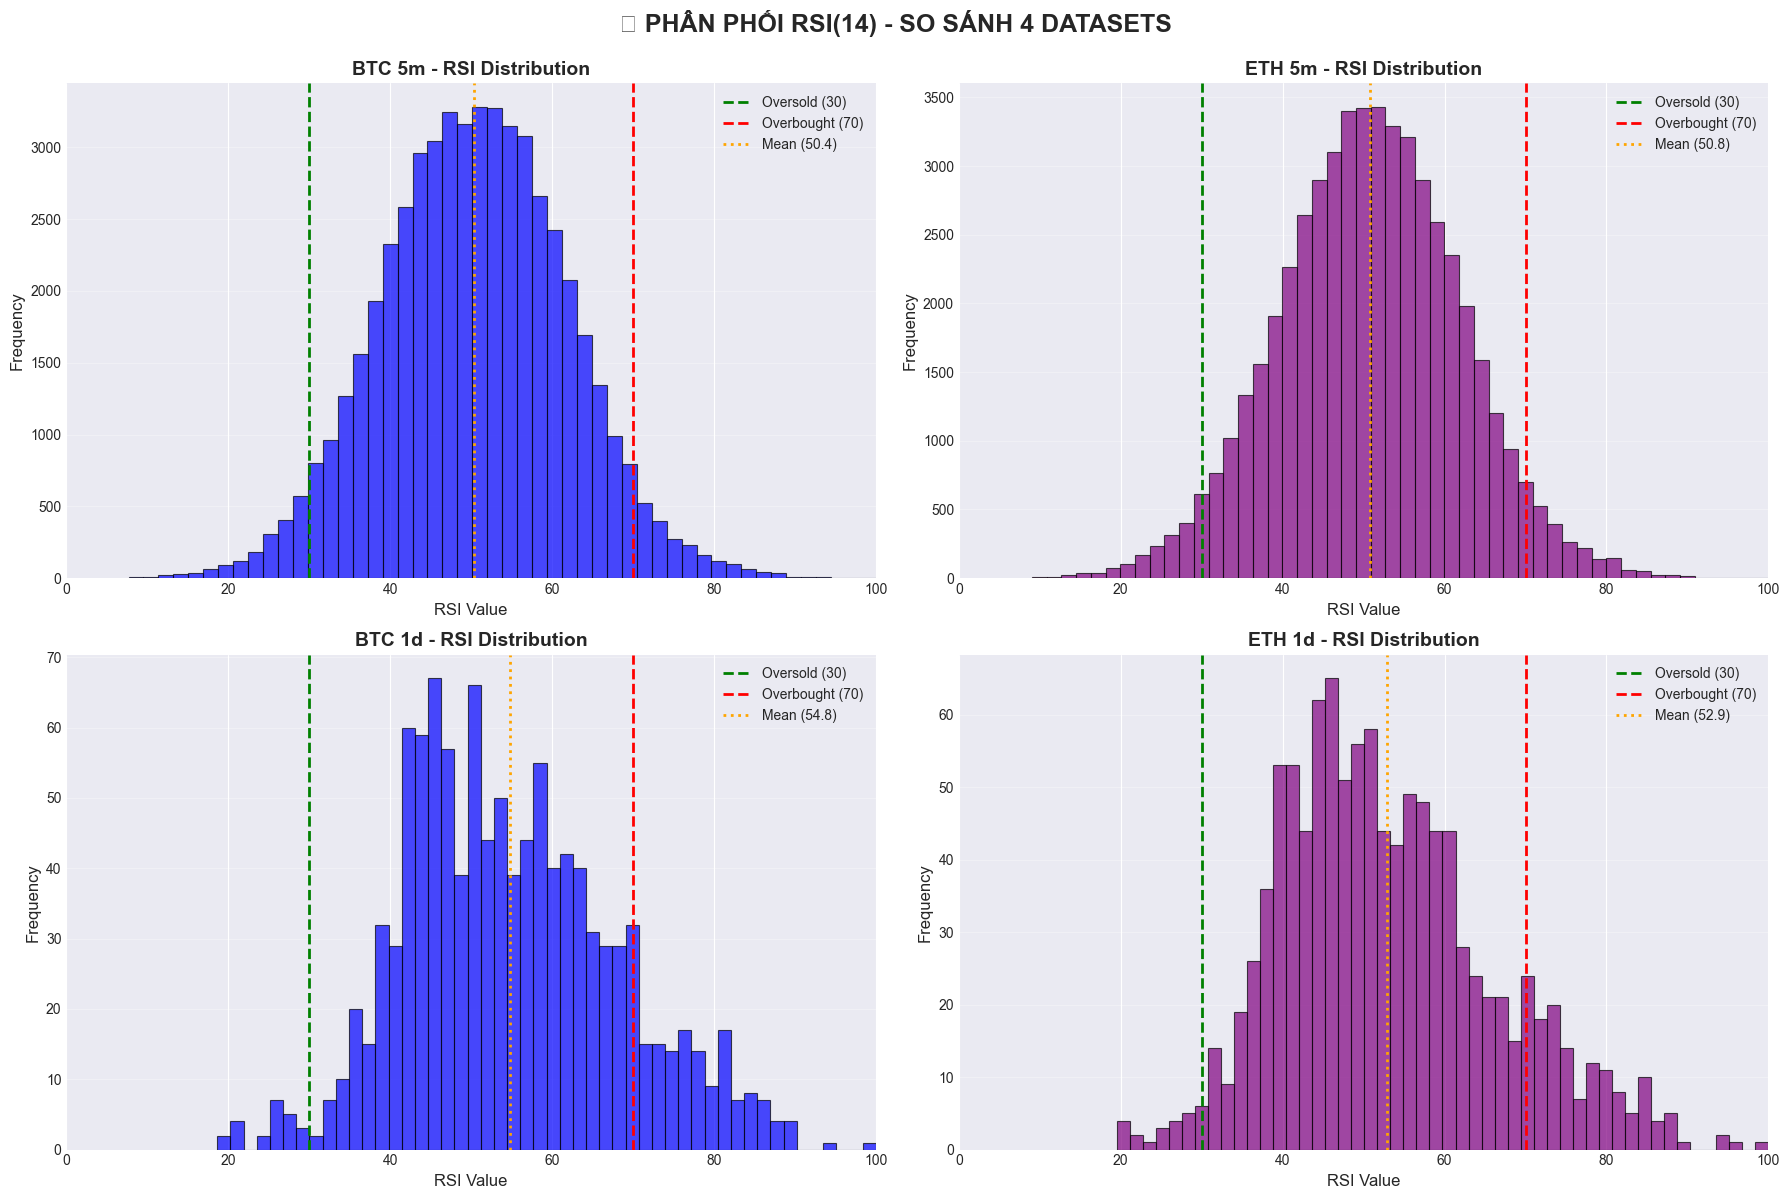

In [9]:
# Vẽ histogram so sánh phân phối RSI
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

colors = ['blue', 'purple', 'blue', 'purple']
dataset_list = [
    ('BTC 5m', datasets_with_rsi['BTC 5m']),
    ('ETH 5m', datasets_with_rsi['ETH 5m']),
    ('BTC 1d', datasets_with_rsi['BTC 1d']),
    ('ETH 1d', datasets_with_rsi['ETH 1d'])
]

for idx, (name, df) in enumerate(dataset_list):
    row = idx // 2
    col = idx % 2
    
    # Histogram
    axes[row, col].hist(df['RSI_14'].dropna(), bins=50, color=colors[idx], 
                        alpha=0.7, edgecolor='black', linewidth=0.8)
    
    # Đường phân vùng
    axes[row, col].axvline(x=30, color='green', linestyle='--', linewidth=2, label='Oversold (30)')
    axes[row, col].axvline(x=70, color='red', linestyle='--', linewidth=2, label='Overbought (70)')
    
    # Thêm text annotation
    mean_rsi = df['RSI_14'].mean()
    axes[row, col].axvline(x=mean_rsi, color='orange', linestyle=':', linewidth=2, label=f'Mean ({mean_rsi:.1f})')
    
    axes[row, col].set_title(f'{name} - RSI Distribution', fontsize=14, fontweight='bold')
    axes[row, col].set_xlabel('RSI Value', fontsize=12)
    axes[row, col].set_ylabel('Frequency', fontsize=12)
    axes[row, col].legend(fontsize=10)
    axes[row, col].grid(True, alpha=0.3, axis='y')
    axes[row, col].set_xlim(0, 100)

plt.suptitle('📊 PHÂN PHỐI RSI(14) - SO SÁNH 4 DATASETS', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

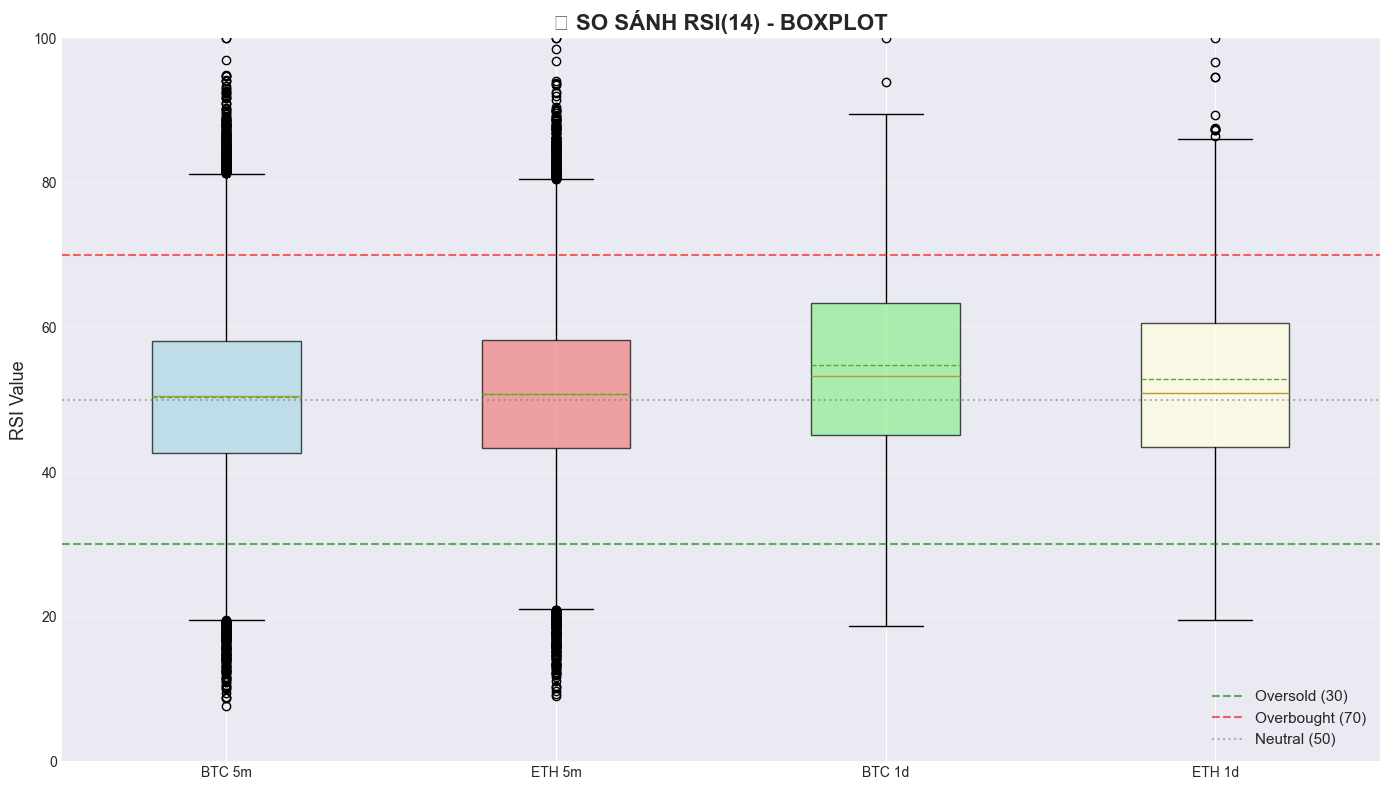

In [10]:
# Boxplot so sánh RSI
fig, ax = plt.subplots(figsize=(14, 8))

rsi_data = [
    datasets_with_rsi['BTC 5m']['RSI_14'].dropna(),
    datasets_with_rsi['ETH 5m']['RSI_14'].dropna(),
    datasets_with_rsi['BTC 1d']['RSI_14'].dropna(),
    datasets_with_rsi['ETH 1d']['RSI_14'].dropna()
]

bp = ax.boxplot(rsi_data, labels=['BTC 5m', 'ETH 5m', 'BTC 1d', 'ETH 1d'],
                patch_artist=True, showmeans=True, meanline=True)

# Tô màu các box
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Thêm đường tham chiếu
ax.axhline(y=30, color='green', linestyle='--', linewidth=1.5, alpha=0.6, label='Oversold (30)')
ax.axhline(y=70, color='red', linestyle='--', linewidth=1.5, alpha=0.6, label='Overbought (70)')
ax.axhline(y=50, color='gray', linestyle=':', linewidth=1.5, alpha=0.6, label='Neutral (50)')

ax.set_title('📊 SO SÁNH RSI(14) - BOXPLOT', fontsize=16, fontweight='bold')
ax.set_ylabel('RSI Value', fontsize=13)
ax.set_ylim(0, 100)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

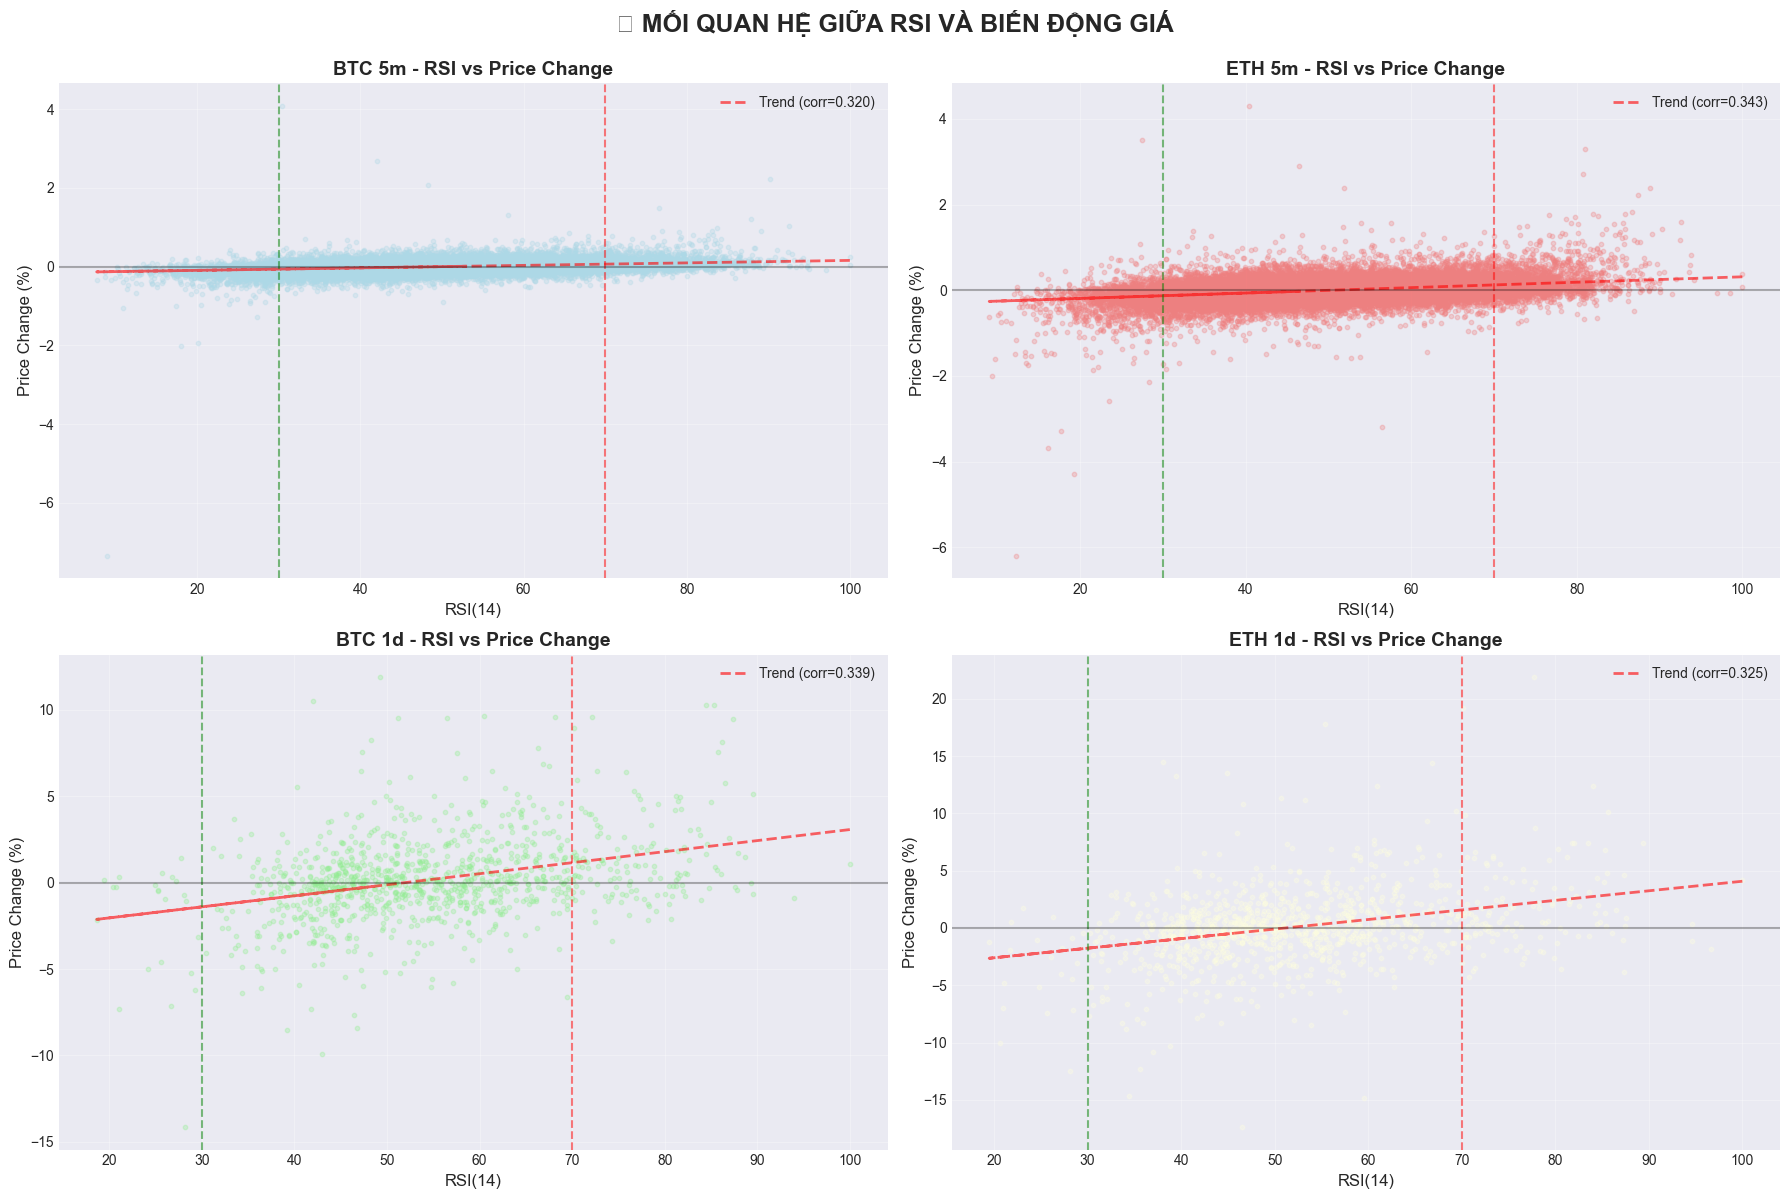

In [11]:
# Tính % thay đổi giá
for name, df in datasets_with_rsi.items():
    df['price_change_pct'] = df['close'].pct_change() * 100

# Vẽ scatter plot: RSI vs Price Change
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for idx, (name, df) in enumerate(dataset_list):
    row = idx // 2
    col = idx % 2
    
    # Lọc dữ liệu hợp lệ
    valid_data = df[['RSI_14', 'price_change_pct']].dropna()
    
    # Scatter plot
    axes[row, col].scatter(valid_data['RSI_14'], valid_data['price_change_pct'], 
                          alpha=0.3, s=10, color=colors[idx])
    
    # Tính correlation
    corr = valid_data['RSI_14'].corr(valid_data['price_change_pct'])
    
    # Thêm đường xu hướng
    z = np.polyfit(valid_data['RSI_14'], valid_data['price_change_pct'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(valid_data['RSI_14'], p(valid_data['RSI_14']), 
                       "r--", alpha=0.6, linewidth=2, label=f'Trend (corr={corr:.3f})')
    
    axes[row, col].axvline(x=30, color='green', linestyle='--', alpha=0.5)
    axes[row, col].axvline(x=70, color='red', linestyle='--', alpha=0.5)
    axes[row, col].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    axes[row, col].set_title(f'{name} - RSI vs Price Change', fontsize=14, fontweight='bold')
    axes[row, col].set_xlabel('RSI(14)', fontsize=12)
    axes[row, col].set_ylabel('Price Change (%)', fontsize=12)
    axes[row, col].legend(fontsize=10)
    axes[row, col].grid(True, alpha=0.3)

plt.suptitle('📊 MỐI QUAN HỆ GIỮA RSI VÀ BIẾN ĐỘNG GIÁ', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [12]:
# Lưu tất cả datasets với RSI vào file CSV
print("💾 Đang lưu dữ liệu...\n")

save_mapping = {
    'BTCUSDT_5m_rsi.csv': datasets_with_rsi['BTC 5m'],
    'ETHUSDT_5m_rsi.csv': datasets_with_rsi['ETH 5m'],
    'BTCUSDT_1d_rsi.csv': datasets_with_rsi['BTC 1d'],
    'ETHUSDT_1d_rsi.csv': datasets_with_rsi['ETH 1d']
}

for filename, df in save_mapping.items():
    filepath = DATA_DIR / filename
    
    # Chọn columns cần lưu
    df_save = df[['datetime', 'open', 'high', 'low', 'close', 'volume', 'RSI_14']].copy()
    
    # Lưu file
    df_save.to_csv(filepath, index=False)
    
    print(f'✅ Đã lưu: {filepath}')
    print(f'   → {len(df_save):,} dòng | Columns: {list(df_save.columns)}')
    print()

print('✅ Hoàn thành! Dữ liệu với RSI đã được lưu vào data/processed/')

💾 Đang lưu dữ liệu...

✅ Đã lưu: ../data/processed/BTCUSDT_5m_rsi.csv
   → 52,416 dòng | Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume', 'RSI_14']

✅ Đã lưu: ../data/processed/ETHUSDT_5m_rsi.csv
   → 52,416 dòng | Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume', 'RSI_14']

✅ Đã lưu: ../data/processed/BTCUSDT_1d_rsi.csv
   → 1,095 dòng | Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume', 'RSI_14']

✅ Đã lưu: ../data/processed/ETHUSDT_1d_rsi.csv
   → 1,095 dòng | Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume', 'RSI_14']

✅ Hoàn thành! Dữ liệu với RSI đã được lưu vào data/processed/
